In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date

In [2]:
# Path is where you put the data you downloaded from mattermost

# you can see where this jupyter notebook is opened by running the command `pwd`
# uncomment to see your (p)resent (w)orking (d)irectory 
# pwd 

# always end the path with a forward slash 
# here we are inside the exercises folder to go back and access the datasets folder we can use ..
path = '../datasets/18.11/'

# ls to print the names of all the files that are present in your current working directory

In [3]:
ls

04.11_1D Sea Ice Model I with SNOW.ipynb
18.11_Handling netCDF files_Sea Ice Data.ipynb
28.10 1D Sea Ice Model I.ipynb


In [4]:
pwd

'/Users/swarnalee/Desktop/uhh/sem 1/sea-ice-physics/exercises'

In [5]:
# creating variables to just to store the filename (string)

file_siaobs = 'SeaIceArea__NorthernHemisphere__monthly__UHH__v2019_fv0.01.nc'
file_siv = 'PIOMAS.monthly.Current.v2.1.csv'
file_siacmip = 'MPI-ESM_nh_all_fv0.02.nc'

In [6]:
# opening the netCDF dataset 'SeaIceArea__NorthernHemisphere__monthly__UHH__v2019_fv0.01.nc' 
# using the function `Dataset` from the `netCDF4` module (check cell 1)

sia_netcdf=Dataset(path+file_siaobs)

In [7]:
# this prints all the metadata (supplementary information) that is contained in the dataset
# for e.g., description of the file, contributor, organisation, history, 
        #   dimensions, variable names (contained inside the dataset) etc.

sia_netcdf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Arctic sea-ice area derived from sea-ice concentration for different sources
    summary: This dataset contains the monthly mean Arctic sea-ice area calculated from monthly or daily mean sea-ice concentration fields from different sources. For sources of daily mean sea-ice concentration, the daily sea-ice area is calculated, and then a monthly average is performed. When required, temporal gaps of less than 7 days and spatial gaps of less than 1000 grid cells are interpolated in the dataset.
    institution: Institut für Meereskunde, University of Hamburg
    topiccategory: Oceans ClimatologyMeteorologyAtmosphere
    keywords: Earth Science > Cryosphere > Sea Ice > Sea Ice Area
 Earth Science > Oceans > Sea Ice > Sea Ice Area

    keywords_vocabulary: GCMD Science Keywords
    time_coverage_start: 1850-01-01T00:00:00Z
    time_coverage_end: 2020-01-01T00:00:00Z
    ti

In [8]:
# prints the variable names contained inside the nc file
# also prints long_name, units, fillvalue, dimensions etc

sia_netcdf.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: time
     standard_name: time
     units: days since 1850-01-01 00:00:00
     calendar: gregorian
 unlimited dimensions: time
 current shape = (2040,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'HadISST_nsidc': <class 'netCDF4._netCDF4.Variable'>
 float64 HadISST_nsidc(time)
     _FillValue: -9999.0
     long_name: HadISST_nsidc monthly Arctic sea-ice area
     standard_name: sea_ice_area
     units: 1e6 km2
 unlimited dimensions: time
 current shape = (2040,)
 filling on,
 'HadISST_orig': <class 'netCDF4._netCDF4.Variable'>
 float64 HadISST_orig(time)
     _FillValue: -9999.0
     long_name: HadISST_orig monthly Arctic sea-ice area
     standard_name: sea_ice_area
     units: 1e6 km2
 unlimited dimensions: time
 current shape = (2040,)
 filling on,
 'nsidc_bt': <class 'netCDF4._netCDF4.Variable'>
 float64 nsidc_bt(time)
     _FillValue: -9999.0
     long_name: nsidc_bt monthly Arctic 

In [9]:
# to actually access the data from the variables now 
# [:] will fetch all the data that is inside the variable

sia_osisaf = sia_netcdf.variables['osisaf'][:]

sia_nt = sia_netcdf.variables['nsidc_nt'][:]

sia_bt = sia_netcdf.variables['nsidc_bt'][:]

sia_hadis = sia_netcdf.variables['HadISST_nsidc'][:]

sia_walsh = sia_netcdf.variables['walsh'][:]

In [10]:
# To find out what is what is in there?
sia_osisaf

masked_array(data=[        nan,         nan,         nan, ...,
                    4.94781598,  8.42972942, 10.89132686],
             mask=False,
       fill_value=1e+20)

In [11]:
# or
print(sia_osisaf)

[        nan         nan         nan ...  4.94781598  8.42972942
 10.89132686]


In [12]:
# checking the length of this data

len(sia_osisaf)

2040

In [13]:
# checking the time period of the data

sia_netcdf.variables['time']

# we can see that this is a daily data (check units) from January 1, 1850

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time
    standard_name: time
    units: days since 1850-01-01 00:00:00
    calendar: gregorian
unlimited dimensions: time
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [14]:
# if we try to plot the data that we just extracted it won't work 
# what we have right now is just an array of data we don't have an axis to plot this data against

sia_osisaf.plot()

AttributeError: 'MaskedArray' object has no attribute 'plot'

In [15]:
# Lets look at September only
Month = 9

# Get every 12th value starting for September
sia_osisaf_sep = sia_osisaf.data[Month - 1::12]
sia_nt_sep = sia_nt.data[Month - 1::12]
sia_bt_sep = sia_bt.data[Month - 1::12]

In [16]:
# Now so as to plot this data we have to set up the time period as the x-axis 
# To do so we will create an empty data frame with just the timestamp first
# Define an empty data frame; data set ends in Dec 2019

sia_obs = pd.DataFrame(index=range(1850, 2020))

In [17]:
sia_obs

""
1850
1851
1852
1853
1854
...
2015
2016
2017
2018


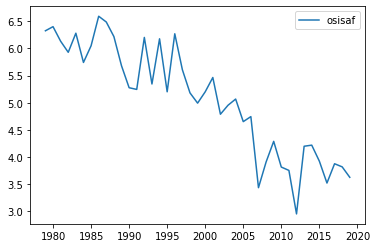

In [18]:
# Put one of the observation data sets in the dataframe (as columns) and plot it

sia_obs['osisaf'] = sia_osisaf_sep
sia_obs.plot()
plt.show()

In [19]:
# You may want to plot sia_nt and sia_bt as well for comparison.

# Create more columns in the dataframe 
sia_obs['NASA-Team'] = sia_nt_sep
sia_obs['Comiso-Bootstrap'] = sia_bt_sep

In [20]:
sia_obs

,osisaf,NASA-Team,Comiso-Bootstrap
1850,NaN,NaN,NaN
1851,NaN,NaN,NaN
1852,NaN,NaN,NaN
1853,NaN,NaN,NaN
1854,NaN,NaN,NaN
...,...,...,...
2015,3.921370,3.501519,4.239273
2016,3.517546,2.982324,3.991517
2017,3.873521,3.414899,4.395924
2018,3.816021,3.431573,4.269291


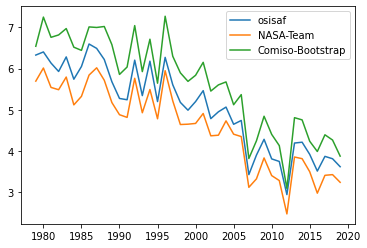

In [21]:
sia_obs.plot()
plt.show()

In [22]:
sia_osisaf_sep_obs = sia_osisaf_sep[129:170]  # for later use
sia_nt_sep_obs = sia_nt_sep[129:170]  # for later use
sia_bt_sep_obs = sia_bt_sep[129:170]  # for later use

In [23]:
# To compute summary statistics

print('Mean \n',sia_obs.mean()) 
print('Standard Deviation \n', sia_obs.std())
print('Median \n', sia_obs.median())

Mean 
 osisaf              5.061112
NASA-Team           4.595567
Comiso-Bootstrap    5.642873
dtype: float64
Standard Deviation 
 osisaf              1.023433
NASA-Team           0.984473
Comiso-Bootstrap    1.136632
dtype: float64
Median 
 osisaf              5.200283
NASA-Team           4.733494
Comiso-Bootstrap    5.836928
dtype: float64


## CMIP6 Sea Ice Area Data Set

In [24]:
# Read, select and plot the CMIP6 sea ice area data from historical runs, data sets end in Dec 2014
sia_netcdf_cmip = Dataset(path + file_siacmip)
sia_netcdf_cmip

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: MPI-ESM_NH_all_runs_sea_ice_area_fv0.02
    summary: CMIP6 Model MPI-ESM1-2-LR Northern Hemisphere sea ice area, historical (10), piControl (2), ssp119 (0), ssp126 (10), ssp245 (10), ssp370 (10), and ssp585 (10) runs //// CMIP6 Model MPI-ESM1-2-HAM Northern Hemisphere sea ice area, historical (3), piControl (1), ssp119 (0), ssp126 (0), ssp245 (0), ssp370 (3), and ssp585 (0) runs //// CMIP6 Model MPI-ESM1-2-HR Northern Hemisphere sea ice area, historical (10), piControl (1), ssp119 (0), ssp126 (2), ssp245 (2), ssp370 (10), and ssp585 (2) runs
    source: MPI-ESM1-2-LR (2017): aerosol: none, prescribed MACv2-SP, atmos: ECHAM6.3 (spectral T63; 192 x 96 longitude/latitude; 47 levels; top level 0.01 hPa), atmosChem: none, land: JSBACH3.20, landIce: none/prescribed, ocean: MPIOM1.63 (bipolar GR1.5, approximately 1.5deg; 256 x 220 longitude/latitude; 40 levels; top grid cel

In [25]:
sia_netcdf_cmip.variables

{'time_historical': <class 'netCDF4._netCDF4.Variable'>
 float64 time_historical(time_historical)
     _FillValue: nan
     standard_name: time
     long_name: time coordinate of historical runs
     units: days since 1850-01-01 00:00:00
     calendar: gregorian
 unlimited dimensions: 
 current shape = (1980,)
 filling on,
 'MPI_ESM1_2_HAM_hist_0': <class 'netCDF4._netCDF4.Variable'>
 float64 MPI_ESM1_2_HAM_hist_0(time_historical)
     _FillValue: -32767.0
     standard_name: sea_ice_area
     long_name: total_sea_ice_area_in_the_northern_hemisphere_historical ensemble #1
     missing_value: -32767.0
     units: 1e6km2
     cell_methods: area: mean where sea time: mean
 unlimited dimensions: 
 current shape = (1980,)
 filling on,
 'MPI_ESM1_2_HAM_hist_1': <class 'netCDF4._netCDF4.Variable'>
 float64 MPI_ESM1_2_HAM_hist_1(time_historical)
     _FillValue: -32767.0
     standard_name: sea_ice_area
     long_name: total_sea_ice_area_in_the_northern_hemisphere_historical ensemble #2
     m

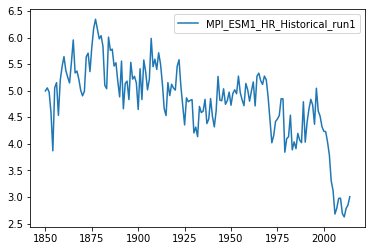

In [26]:
# this is the first ensemble member; there are in total 10
sia_mpiesm1_0 = sia_netcdf_cmip.variables['MPI_ESM1_2_HR_hist_0'][:]
sia_mpiesm1_0_sep = sia_mpiesm1_0.data[Month-1::12]
sia_cmip = pd.DataFrame(index=range(1850, 2015))
sia_cmip['MPI_ESM1_HR_Historical_run1'] = sia_mpiesm1_0_sep
sia_cmip.plot()
plt.show()

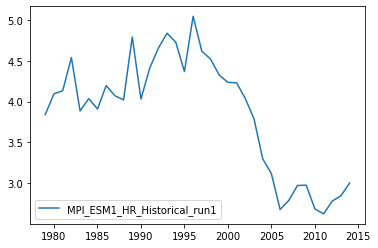

In [27]:
# To only get the part of the data overlapping with the observations
sia_cmip_overlap_obs = sia_cmip[129:165]
sia_cmip_overlap_obs.plot()
plt.show()

## Read, select and plot the PIOMAS sea-ice volume time series

In [28]:
siv = pd.read_csv(path + file_siv, index_col='year')

In [29]:
siv

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1979.0,27.7036,30.1709,32.0455,32.9513,32.2945,29.7875,23.66100,18.40910,16.91070,17.85350,20.12350,23.2010
1980.0,26.5299,29.1541,31.1279,32.2346,31.8074,29.1523,22.86450,17.79000,16.31610,17.32450,19.42430,22.4513
1981.0,25.3175,27.7703,29.8183,30.7443,30.0339,26.8173,20.17270,14.63510,12.80820,13.96500,16.14480,19.1146
1982.0,22.6329,25.4864,27.6531,28.9682,28.3020,25.6161,19.66470,14.83440,13.50770,14.91130,17.76570,21.0663
1983.0,24.4571,27.2786,29.3852,30.3864,30.1703,27.7582,21.85430,16.73810,15.19950,16.42690,18.95410,21.9620
1984.0,24.7330,27.2087,29.1508,30.3299,29.8162,27.0926,20.94100,16.14780,14.63460,15.66350,18.09680,21.2919
1985.0,24.6393,27.2635,29.4531,30.8644,30.5172,27.4881,20.76780,16.01190,14.58260,15.83770,18.28850,21.2849
1986.0,24.6783,27.5181,29.7704,30.9342,30.4565,27.8608,21.95310,17.29290,16.07590,17.37840,19.85670,22.7380
1987.0,26.0250,28.8396,30.6631,31.7899,31.5025,28.8143,22.27450,16.70830,15.35310,16.70340,19.25470,22.2986


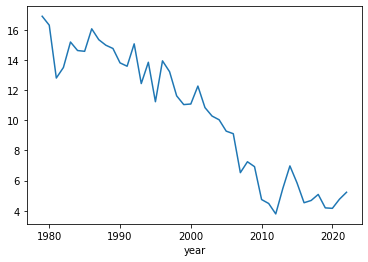

In [30]:
siv_sep = siv['Sep']
siv_sep.plot()
plt.show()

In [31]:
siv_sep_until2019 = siv_sep.loc[:2019.0] # for later use

In [32]:
# Lets check whether we get the same trend in sea ice volume as printed on the slide:

coefficients, residuals, _, _, _ = np.polyfit(range(len(siv_sep.index)),
                                              siv_sep,
                                              1,
                                              full=True)

mse = residuals[0] / (len(siv_sep.index))

nrmse = np.sqrt(mse) / (siv_sep.max() - siv_sep.min())

print('Slope ' + str(coefficients[0] * 10))
print('NMRSE ' + str(nrmse * 10))

# The *10 is to get the trend per decade

Slope -3.125735236081746
NMRSE 1.032152609417233


In [33]:
# What is the trend until including 2019?
coefficients, residuals, _, _, _ = np.polyfit(range(len(siv_sep_until2019.index)),
                                              siv_sep_until2019,
                                              1,
                                              full=True)

mse = residuals[0] / (len(siv_sep_until2019.index))

nrmse = np.sqrt(mse) / (siv_sep_until2019.max() - siv_sep_until2019.min())

print('Slope ' + str(coefficients[0] * 10))
print('NMRSE ' + str(nrmse * 10))

Slope -3.224946428571425
NMRSE 1.0406683527676037


In [34]:
# What happens if we use the OSISAF SIA time series and compute the volume trend
# using a constant sea ice thickness?
coefficients, residuals, _, _, _ = np.polyfit(range(len(siv_sep_until2019.index)),
                                              sia_osisaf_sep_obs * 2.0,
                                              1,
                                              full=True)

# Note we use the sea ice volume data set for the index because the OSISAF SIA one does not have an index
mse = residuals[0] / (len(siv_sep_until2019.index))

In [35]:
nrmse = np.sqrt(mse) / (sia_osisaf_sep_obs.max() * 2.0 -
                        sia_osisaf_sep_obs.min() * 2.0)
print('Slope ' + str(coefficients[0] * 10))
print('NMRSE ' + str(nrmse * 10))

Slope -1.5491357684923037
NMRSE 1.1698030857471484


# You may test whether the values change using a different sea ice thickness value. What could be the conclusion?

# Resources

- [Data Carpentry for Oceanographers](https://adyork.github.io/python-oceanography-lesson/) is a very good introduction to not just netCDF but Introduction to Python for Oceanographers
- [xarray netCDF tutorial](https://docs.xarray.dev/en/stable/user-guide/io.html) xarray is also a very powerful python package for handling netCDF files in Python. In this notebook only the package `netCDF` has been used.
- [Climate Unboxed YouTube Channel](https://www.youtube.com/@climateunboxed/) A nice place to learn about various methods and tool used in Climate Data Analysis
- [Introduction to netCDF from Copernicus Marine Service](https://youtu.be/K1_8EqCJlwo)
- [NetCDF Why and How: Creating Publication Quality NetCDF Datasets](https://www.youtube.com/watch?v=7YYTXa4qyfo) good visualization of the structure of netCDF files from NASA Earth Data (till 17:20)